# Week 8 exercise 1: Handling NETCDF data

Questions?
contact: pengfei.liu@eas.gatech.edu

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
# if you get errors to import these packages , you will need to install them in Anaconda
# in anaconda command prompt (windows) or terminal (mac/linux) 
# Activate your environment, then type:
# conda install xarray  

In [25]:
## load Atlanta temperature data
# load excel data as pandas dataframe
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)
data=df.to_numpy()
TMP_ATL_month=data[:,1:]
TMP_ATL_year=np.nanmean(TMP_ATL_month,1)
# unit conversion deg F ->deg C
TMP_ATL_year_degC=(TMP_ATL_year-32)*(5/9)
year=df.Year.to_numpy()
TMP_ATL_year_degC

array([16.53240741, 16.83333333, 16.86574074, 16.84259259, 16.6712963 ,
       16.2037037 , 14.96759259, 15.24537037, 16.14351852, 16.1712963 ,
       16.15740741, 17.07407407, 15.90277778, 15.35185185, 15.96296296,
       16.44907407, 15.40740741, 16.77777778, 16.54166667, 16.33796296,
       16.47222222, 16.58796296, 15.23611111, 16.18055556, 15.60185185,
       15.6712963 , 15.86574074, 16.18055556, 16.51851852, 16.49074074,
       16.33796296, 15.87037037, 17.10648148, 15.62962963, 16.63888889,
       16.14351852, 16.30092593, 16.3287037 , 15.31018519, 16.52314815,
       16.7962963 , 15.58333333, 17.51851852, 16.98611111, 16.375     ,
       15.65740741, 17.4537037 , 16.14351852, 17.33333333, 15.94907407,
       16.31481481, 16.39814815, 17.21296296, 16.81018519, 17.33796296,
       16.25462963, 16.55555556, 16.79166667, 16.37037037, 17.25462963,
       17.11111111, 15.39351852, 16.97222222, 16.41203704, 16.76388889,
       16.68981481, 16.88425926, 17.12037037, 16.00462963, 16.88

## Mini project #1: handling high dimensional NETCDF data

In [11]:
# Download the most recent NCEP renalysis monthly data from the link below:
# https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.surface.html
# read NCEP reanalysis monthly data (in netcdf format)
# if you get an error in this step, most likely the netcdf4 package is missing in your environment
# to install netcdf4 package, type "conda install netcdf4" in command line
ds=xr.open_dataset('./air.mon.mean.nc')
# show a summary of the dataset
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 883)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-07-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [26]:
# extract surface air temperature data for 1948 to 2020
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2020-12-01"))

In [32]:
# Atlanta lat lon
# 33.7490° N, 84.3880° W
# note that the longitude range in NCEP data is 0 - 360 deg

# select data for the grid cell Atlanta located
TMP_ATL_NCEP=TMP_NCEP.sel(lat=33.7490,lon=360-84.3880,method="nearest")

# calculate annual mean temperature for Atlanta
TMP_ATL_NCEP_year=TMP_ATL_NCEP.groupby('time.year').mean('time')

# calculate climatological mean temperature for Atlanta
TMP_ATL_NCEP_month=TMP_ATL_NCEP.groupby('time.month').mean('time')

# August temperature for ATL
mon=8;
TMP_ATL_NCEP_AUG=TMP_ATL_NCEP.sel(time=TMP_ATL_NCEP['time.month']==mon)
TMP_ATL_NCEP_AUG

<xarray.DataArray 'air' (time: 73)>
array([23.8371  , 24.155802, 23.5542  , 25.645163, 24.355162, 24.212582,
       25.909678, 24.949352, 24.713547, 24.575485, 24.673868, 25.130322,
       24.17548 , 23.57548 , 24.955479, 25.145483, 24.127739, 24.265799,
       23.904833, 23.448385, 25.17354 , 23.403868, 24.500324, 23.79903 ,
       25.08903 , 23.98968 , 23.757092, 24.444191, 23.594194, 24.286776,
       24.667736, 24.726448, 25.369349, 23.700642, 24.224516, 25.570963,
       24.008709, 24.081934, 24.209995, 25.565804, 24.773546, 24.313547,
       25.497091, 24.317421, 23.743872, 25.259026, 23.753868, 25.629997,
       24.14935 , 24.115482, 25.585808, 26.245806, 25.925158, 24.489037,
       24.719997, 24.608713, 23.936771, 25.355808, 25.998709, 27.113228,
       24.303549, 24.039997, 26.194519, 26.089354, 24.296133, 24.581293,
       25.396452, 24.945156, 25.774984, 24.852407, 24.737896, 25.645153,
       25.44838 ], dtype=float32)
Coordinates:
    lat      float32 32.5
    lon      float32 275.0
  * time     (time) datetime64[ns] 1948-08-01 1949-08-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

## Mini project #2: simple 1-D plot with multiple lines

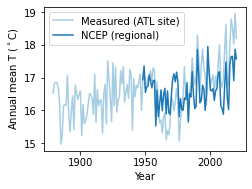

In [13]:
# make a figure that fits into a single column
fig=plt.figure(figsize=(3.5, 2.5)) # define figure size, unit: inches
ax=fig.add_axes([0.1, 0.15, 0.8, 0.8])
cmap=plt.get_cmap('Paired')
plt.plot(year,TMP_ATL_year_degC,label='Measured (ATL site)',color=cmap(0)) 
plt.plot(TMP_ATL_NCEP_year.year,TMP_ATL_NCEP_year,label='NCEP (regional)',color=cmap(1))
plt.xlabel('Year')
plt.ylabel('Annual mean T ($^\circ$C)')
# add figure legend
plt.legend()

# save figure as .PDF and .PNG
# put save commands before plt.show()
fn='Fig_ATL_temp'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")
plt.show()

## Mini project # 4: Make a multiple panel plot 

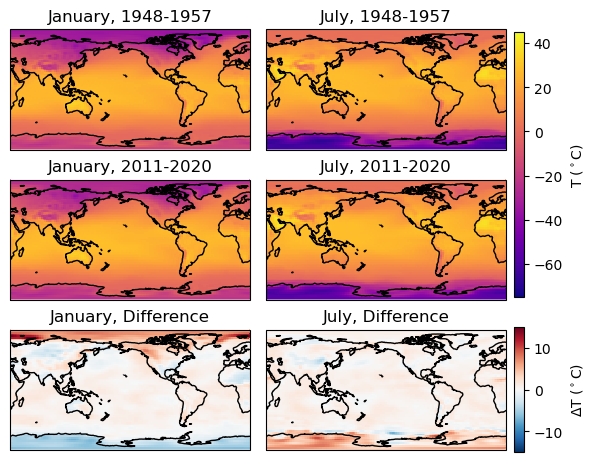